In [1]:
from snowpat import snowpackreader as spr

from snowpat import SnowLense as sl#
import datetime


# Please also read the Documentation, as this will give not much explanation!

# Read the data

In [2]:
pro = spr.readPRO("test.pro")


In [3]:
pro.discard_below_ground(discard=True)

# Set the desired Plots

In [4]:
profile = pro.get_profile_nr(300)
date = datetime.datetime(2022, 11, 7, 12, 0, 0)
var_codes = ["0513, 0503"] # Per default only grain type, i.e. 0513 is plotted
var_codes = [pro.name_to_code("grain type"), pro.name_to_code("element temperature")]


# The Plotter functinoality

Set up a plotter class, and use the built in functions to plot and show

In [5]:
plotter = sl.SnowpackPlotter(pro,savefile="test.png")

In [6]:
fig = plotter.plot(var_codes=var_codes)

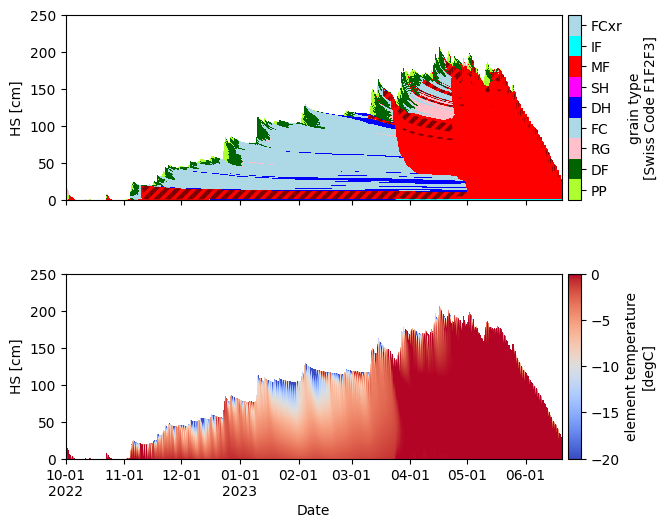

In [7]:
sl.show_figure(fig)
# or plotter.show()

In [8]:
plotter.save()
# or plotter.save("test.png")

In [9]:
ax = plotter.getSubplot(1)

In [10]:
fig_latest = plotter.getLatestFigure()

It is possible to plot a single profile directly from the plotter:

In [11]:
fig_profile = plotter.plotProfileOn(date)

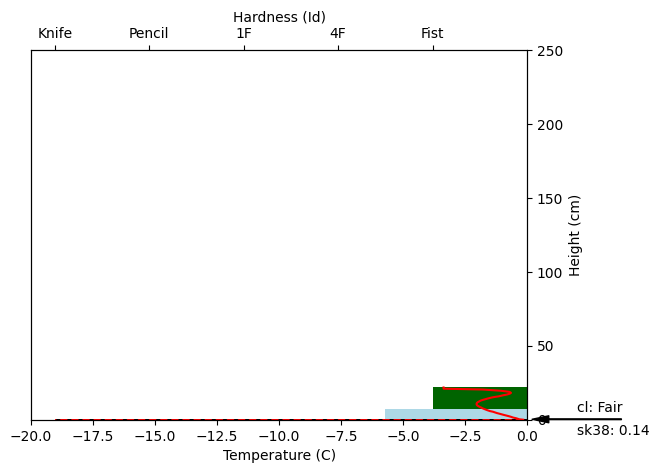

In [12]:
sl.show_figure(fig_profile)
# or plotter.show()

# Plot specific Profiles

In [13]:
fig_profile2 = sl.plotProfile(profile, out="test.png", ind_mfcrust=True, standardized_limits=True)

# The Most Important part:

Wrappers for all this functionality exists with the plot function, and if you are unsure about how to use it, just use the help function, you can give it all the arguments you would give the plot function to see what else you need or what needs to be adjusted

In [14]:
fig, plotter = sl.plot(pro, var_codes=var_codes ,outfile="test.png", ind_mfcrust=False, n_cols=2) 

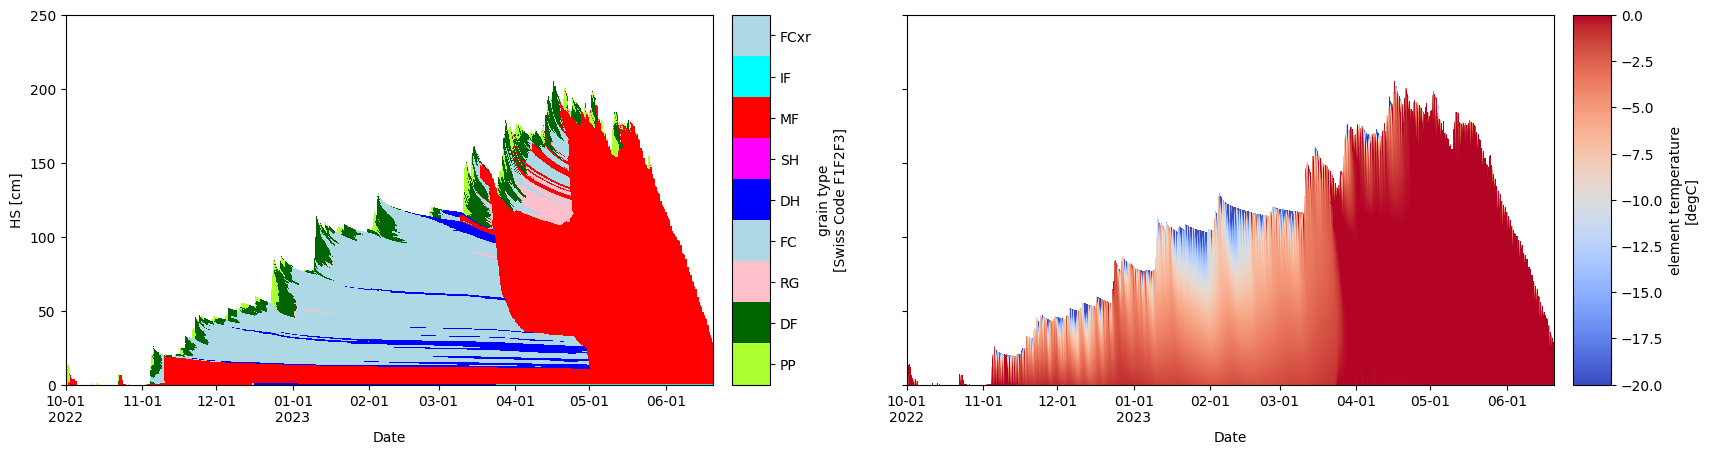

In [15]:
sl.show_figure(fig)

In [16]:
sl.help(pro, var_codes=var_codes ,outfile="test.png", ind_mfcrust=False, n_cols=2) 

These keyword arguments will be used directly:
	outfile
	var_codes
	ind_mfcrust
	n_cols


Keyword arguments for plotting from .pro files are:
	start (datetime) : The start time of the plot
	stop (datetime) : The stop time of the plot
	resolution (str) : The resolution of dates of the plot
	num_ticks (int) : The number of ticks on the x-axis, if not set, the ticks will be formatted automatically
	cmap (Either: Colormap, or dict[str, Colormap], or dict[str, str]) : The colormap to use for the plot, either a single colormap or a dictionary with colormaps for each variable
	norm (Either: Normalize, or dict[str, Normalize]) : The normalization to use for the plot, either a single normalization or a dictionary with normalizations for each variable
	cbar_label (Either: str, or dict[str, str], or NoneType) : The label of the colorbar, either a single label or a dictionary with labels for each variable
	n_cols (int) : The subplots to be plotted side by side
	title (str) : The title of the plot


In [17]:
sl.help(pro, var_codes=var_codes , colorbar="foo")

These keyword arguments will be used directly:
	var_codes


These keyword arguments have the wrong type:
	 ['colorbar']
Expected types are:
['colorbar: (bool)']
Got types: ['str']


KeyError: 'var_codes'

# Specific Data Parsing and Colouring Options

It is possible to do some data processing before plotting, and give specific colourmaps, norms... to the plotter

In [18]:
import numpy as np
def edit_data(var_code:str, data:np.ndarray): # This is a dummy function to show how to edit the data
    new_data = data.copy() # !!! be careful to always operate on a copy of the data, otherwise it will change the stored data!!
    if var_code == "0503":
        new_data = data + 273.15 # For example change to Kelvin
    return new_data

cmap = {"0503":"plasma"} # We want to use this colormap for some reason

import matplotlib.colors as mcolors
# you might need to give a new norm then
norm = {"0503": mcolors.Normalize(vmin=250, vmax=280)}

# and now the colorbar label is going to be wrong, as originally it was in Celsius
# so we need to change it
cbar_label = {"0503": "Temperature [K]"}


In [19]:
fig, plotter = sl.plot(pro, var_codes=var_codes, adjust_data=edit_data, cmap=cmap, norm=norm, ind_mfcrust=False, cbar_label=cbar_label)

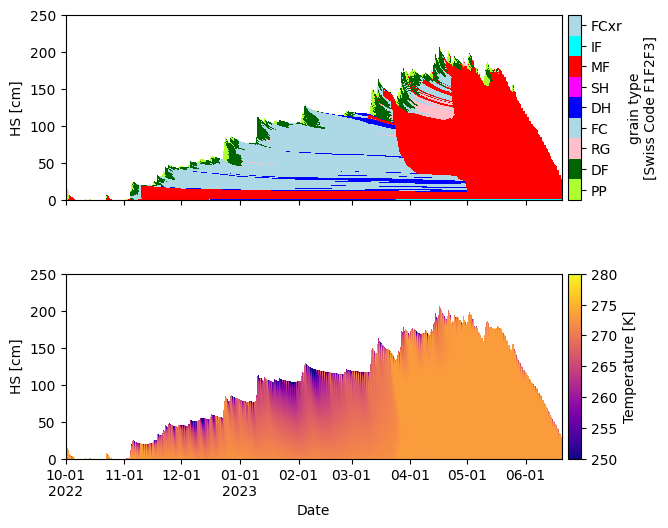

In [20]:
sl.show_figure(fig)